# Predict the plants with Images

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plants-classification/val.csv
/kaggle/input/plants-classification/train.csv
/kaggle/input/plants-classification/test.csv
/kaggle/input/plants-classification/val/classname.txt
/kaggle/input/plants-classification/val/soybeans/soybeans754.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans789.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans784.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans736.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans778.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans763.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans769.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans753.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans749.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans761.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans733.jpg
/kaggle/input/plants-classification/val/soybeans/soybeans772.jpg
/kaggle/input/plants-classifica

In [2]:
import keras
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras import models
from keras import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)

In [4]:
traing=train.flow_from_directory('/kaggle/input/plants-classification/train',target_size=(256,256),class_mode="sparse",batch_size=32)
testg=test.flow_from_directory('/kaggle/input/plants-classification/test',target_size=(256,256),class_mode="sparse",batch_size=32)

validg=valid.flow_from_directory('/kaggle/input/plants-classification/val',target_size=(256,256),class_mode="sparse",batch_size=32)


Found 21000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.


# model Building with functional API architecture

In [7]:
inputs = Input(shape=(256,256,3))
x1 = Conv2D(80,(3,3),strides=(1,1),padding="valid",activation="relu")(inputs)
x2 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x1)

x3 = Conv2D(70,(3,3),strides=(1,1),padding="valid",activation="relu")(x2)
x4 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x3)

x5 = Conv2D(50,(3,3),strides=(1,1),padding="valid",activation="relu")(x4)
x6 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x5)

x7 = Conv2D(50,(3,3),strides=(1,1),padding="valid",activation="relu")(x6)
x8 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x7)

# flatten layer
flat = Flatten()(x8)

# dense layers

d1= Dense(150,activation="relu")(flat)
d2= Dense(100,activation="relu")(d1)
d3=Dense(70,activation='relu')(d2)
d4=Dense(50,activation='relu')(d3)



outputs= Dense(30,activation="softmax")(d4)
model1 = Model(inputs=inputs,outputs=outputs)


In [8]:
model1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 80)      2240      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 80)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 70)      50470     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 70)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 50)        31550 

In [9]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [13]:
history = model1.fit(traing,epochs=5,steps_per_epoch=21000//32,validation_data=validg,validation_steps=3000//32)


Epoch 1/5
656/656 [==============================] - 192s 275ms/step - loss: 3.2874 - accuracy: 0.0620 - val_loss: 3.3128 - val_accuracy: 0.0578
Epoch 2/5
656/656 [==============================] - 81s 123ms/step - loss: 3.0680 - accuracy: 0.1033 - val_loss: 3.0528 - val_accuracy: 0.1304
Epoch 3/5
656/656 [==============================] - 86s 132ms/step - loss: 2.9348 - accuracy: 0.1338 - val_loss: 2.8346 - val_accuracy: 0.1458
Epoch 4/5
656/656 [==============================] - 81s 123ms/step - loss: 2.8271 - accuracy: 0.1531 - val_loss: 2.7869 - val_accuracy: 0.1428
Epoch 5/5
656/656 [==============================] - 81s 124ms/step - loss: 2.9921 - accuracy: 0.1271 - val_loss: 3.0539 - val_accuracy: 0.0907


In [12]:
import matplotlib.pyplot as plt

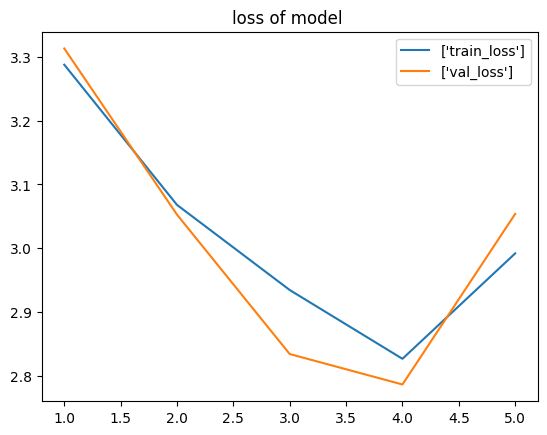

In [14]:
plt.plot(range(1,6),history.history['loss'],label=['train_loss'])

plt.plot(range(1,6),history.history['val_loss'],label=['val_loss'])
plt.title("loss of model ")


plt.legend()

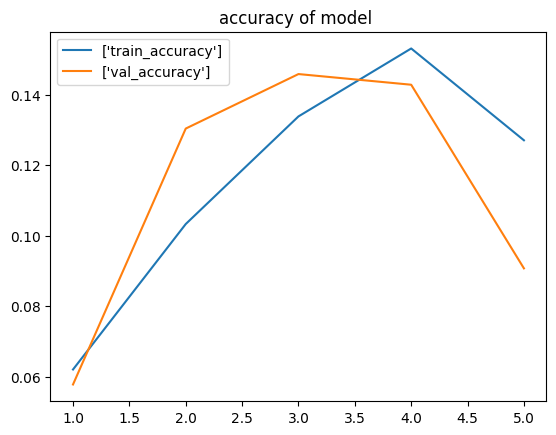

In [15]:
plt.plot(range(1,6),history.history['accuracy'],label=['train_accuracy'])

plt.plot(range(1,6),history.history['val_accuracy'],label=['val_accuracy'])
plt.title("accuracy of model ")

plt.legend()

In [16]:
import cv2
img = cv2.imread("/kaggle/input/plants-classification/test/aloevera/aloevera800.jpg")

In [17]:
img=np.resize(img,(256,256,3))
img=img.reshape(1,256,256,3)

In [18]:
img.shape

(1, 256, 256, 3)

In [19]:
np.argmax(model1.predict(img))


1/1 [==============================] - 0s 220ms/step


1

In [20]:
predicted = model1.predict(testg)


188/188 [==============================] - 57s 302ms/step


In [21]:
# converting the probabilities
final_predicted = np.argmax(predicted,axis=1)

# model saving


In [22]:
model1.save(r"plant_11_presict",save_format="h5")

In [23]:
from keras.models import load_model

In [24]:
# loading model 
model2=load_model(r"plant_11_presict")

In [25]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 254, 254, 80)      2240      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 80)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 70)      50470     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 70)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 50)        31550 